### 采用5折交叉验证，分别用log似然损失和正确率，对Logistic回归模型的正则超参数调优。

#### 特征工程

In [1]:
# 工具包
import numpy as np
import pandas as pd
#数据
Train = pd.read_csv("pima-indians-diabetes.csv")
Train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
Train.describe()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# 发现除了pregnants和Target之外min都不为0，如果没有Na则没有缺失值
NaN_col_names=['Plasma_glucose_concentration','blood_pressure', 'Triceps_skin_fold_thickness', 'serum_insulin','Diabetes_pedigree_function','BMI','Age']
Train[NaN_col_names] = Train[NaN_col_names].replace(0, np.NaN)
medians = Train.median()
Train = Train.fillna(medians)
print(Train[NaN_col_names].isnull().sum())

Plasma_glucose_concentration    0
blood_pressure                  0
Triceps_skin_fold_thickness     0
serum_insulin                   0
Diabetes_pedigree_function      0
BMI                             0
Age                             0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler
y_train = Train['Target']
X_train = Train.drop(['Target'], axis=1)
# 保存结果
feat_names = X_train.columns
#标准化处理
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_train = pd.DataFrame(columns=feat_names, data=X_train)
Train = pd.concat([X_train, y_train], axis=1)
Train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


### 训练模型

In [5]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# 设置参数
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)
%matplotlib inline

# 参数网格
penaltys = ['l1', 'l2']
Cs = [0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C=Cs)
#GridSearchCV+Logistic
Lr_penalty = LogisticRegression()
#最大似然-logloss
NLL_grid = GridSearchCV(Lr_penalty, tuned_parameters, cv=5, scoring='neg_log_loss')
#正确率Accuracy
ACC_grid = GridSearchCV(Lr_penalty, tuned_parameters, cv=5, scoring='accuracy')
NLL_grid.fit(X_train, y_train)
ACC_grid.fit(X_train, y_train)
print("最佳模型是：{}\n它的正确率为{}".format(ACC_grid.best_params_, ACC_grid.best_score_))
print("最佳模型是:{}\n它的似然损失值为：{}".format(NLL_grid.best_params_, -NLL_grid.best_score_))

最佳模型是：{'C': 0.1, 'penalty': 'l2'}
它的正确率为0.7747395833333334
最佳模型是:{'C': 1, 'penalty': 'l1'}
它的似然损失值为：0.4760259824219728


D:\Program Files\Jupyter\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Jupyter\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


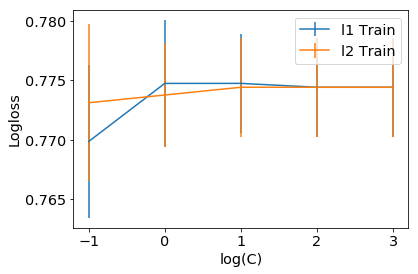

In [11]:
#绘制CV的误差曲线
Test_means = ACC_grid.cv_results_['mean_test_score']
Test_stds = ACC_grid.cv_results_['std_test_score']
Train_means = ACC_grid.cv_results_['mean_train_score']
Train_stds =ACC_grid.cv_results_['std_train_score']

n_CS = len(Cs)
number_penaltys = len(penaltys)
Test_scores = np.array(Test_means).reshape(n_CS, number_penaltys)
Train_scores = np.array(Train_means).reshape(n_CS, number_penaltys)
Test_stds = np.array(Test_stds).reshape(n_CS, number_penaltys)
Train_stds = np.array(Train_stds).reshape(n_CS, number_penaltys)

X_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    plt.errorbar(X_axis, Train_scores[:,i], yerr=Train_stds[:,i] ,label = penaltys[i] +' Train')
    # plt.errorbar(X_axis, Test_scores[:, i], yerr=Test_stds[:, i], label=penaltys[i] + 'Test')
plt.legend()
plt.xlabel('log(C)')
plt.ylabel('Logloss')
plt.show()